# Probability and Statistics Review

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
print('')

In [2]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

These notes review some essential topics involving probability that will be useful later in the course.

## Probability 

Historically, the notion of probability has been slippery and has taken on multiple forms. At least three ways to view probability in practice include:
1. as a mathematical exercise involving positive functions that integrate to 1 (i.e., distributions);
2. as an encoding of natural rules for reasoning under uncertainty; and
3. as an idealization of properties of data and processes.

For our purposes, we will use probability as an abstraction that hides details that are not relevant to our goals. In other words, we will build up a mathematical definition of probability and use it to accomplish data analysis and modeling tasks.

>Any simple idea is approximate; as an illustration, consider an object ... what is an object? Philosophers are always 
>saying, “Well, just take a chair for example.” The moment they say that, you know that they do not know what they are 
>talking about any more. What is a chair? ... every object is a mixture of a lot of things, so we can deal with it 
> only as a series of approximations and idealizations.

>The trick is the idealizations.

Richard Feynman, _The Feynman Lectures on Physics, 12-2_

Here is an illustration of this principle applied to probability:

>In a serious work ... an expression such as “this phenomenon is due to chance” constitutes simply, 
>an elliptic form of speech. ... It really means “everything occurs as if this phenomenon were due to chance,” 
>or, to be more precise: “To describe, or interpret or formalize this phenomenon, 
>only probabilistic models have so far given good results.”

Georges Matheron, _Estimating and Choosing: An Essay on Probability in Practice_

### Probability Measures

**Definition:**  Consider a set $\Omega$, referred to as the
_sample space._  A _probability
  measure_ on $\Omega$ is a function $P[\cdot]$ defined on all the subsets of $\Omega$ (each subset consists of zero or more _events_) such that:
  
1. $P[\Omega] = 1$
2. For any event $A \subset \Omega$, $P[A] \geq 0.$
3. For any events $A, B \subset \Omega$ where $A \cap B =
    \emptyset$, $P[A \cup B] = P[A] + P[B]$.

The sample space $\Omega$ may be continuous or discrete, and bounded or unbounded.

One approach we can take to better understand the constraints that describe a mathematical concept is to try programmatically checking that they hold on some concrete structure. We can do so with Python.

**Example:** One way in which a sample space could be instantiated is as a vector space in which each dimension corresponds to some feature or aspect of an event. For example, we could model two binary aspects of a day:

* Is it sunny?
* Did an earthquake occur?

As we have seen in other contexts, we can represent an observations using vectors in a two-dimensional vector space: $\Omega = \{0,1\}^2$. In this case, a vector such as $(1,0)$ represents a day occurring that is sunny, but during which an earthquake did not occur.

For this example, we could define one possible probability measure (among many others) by specifying the probability of each of the possible $2^4 = 16$ subsets:
* $P[\emptyset] = 0$
* $P[\{(0,0)\}] = 0.2$
* $P[\{(1,0)\}] = 0.3$
* $P[\{(0,1)\}] = 0.1$
* $P[\{(1,1)\}] = 0.4$
* $P[\{(0,0),(0,1)\}] = 0.3$
* $P[\{(0,0),(1,0)\}] = 0.5$
* $P[\{(0,0),(1,1)\}] = 0.6$
* $P[\{(1,0),(0,1)\}] = 0.4$
* $P[\{(1,0),(1,1)\}] = 0.7$
* $P[\{(0,1),(1,1)\}] = 0.5$
* $P[\{(0,0),(0,1),(1,0)\}] = 0.6$
* $P[\{(1,0),(0,1),(1,1)\}] = 0.8$
* $P[\{(0,0),(0,1),(1,1)\}] = 0.7$
* $P[\{(0,0),(1,0),(1,1)\}] = 0.9$
* $P[\{(0,0),(0,1),(1,0),(1,1)\}] = 1$

Note that our definition artificially restricts us to having $P[\emptyset] = 0$ in this example, but we can get around this if necessary by creating some vacuous aspect that is only present when all other aspects are absent.

Another way to interpret the above is to imagine that we have observed 10 different days and collected a data set. The data set could look as follows:

* $\{(0,0)\}$
* $\{(0,0)\}$
* $\{(1,0)\}$
* $\{(1,0)\}$
* $\{(1,0)\}$
* $\{(0,1)\}$
* $\{(1,1)\}$
* $\{(1,1)\}$
* $\{(1,1)\}$
* $\{(1,1)\}$

This approach to interpreting the definition for a probability measure gives us a natural way to check whether some measure $P$ is actually a probability measure.

In [3]:
from itertools import product
import math

fs = frozenset

P = {
    fs(set()): 0,
    fs({(0,0)}): 0.2,
    fs({(1,0)}): 0.3,
    fs({(0,1)}): 0.1,
    fs({(1,1)}): 0.4,
    fs({(0,0),(0,1)}): 0.3,
    fs({(0,0),(1,0)}): 0.5,
    fs({(0,0),(1,1)}): 0.6,
    fs({(1,0),(0,1)}): 0.4,
    fs({(1,0),(1,1)}): 0.7,
    fs({(0,1),(1,1)}): 0.5,
    fs({(0,0),(0,1),(1,0)}): 0.6,
    fs({(1,0),(0,1),(1,1)}): 0.8,
    fs({(0,0),(0,1),(1,1)}): 0.7,
    fs({(0,0),(1,0),(1,1)}): 0.9,
    fs({(0,0),(0,1),(1,0),(1,1)}): 1
  }

def check(P):
    for (A,B) in product(P.keys(), P.keys()):
        if len(A & B) == 0:
            print(P[A.union(B)], P[A]+P[B],\
                      math.isclose(P[A | B], P[A]+P[B]))

check(P)

0 0 True
0.2 0.2 True
0.3 0.3 True
0.1 0.1 True
0.4 0.4 True
0.3 0.3 True
0.5 0.5 True
0.6 0.6 True
0.4 0.4 True
0.7 0.7 True
0.5 0.5 True
0.6 0.6 True
0.8 0.8 True
0.7 0.7 True
0.9 0.9 True
1 1 True
0.2 0.2 True
0.5 0.5 True
0.3 0.30000000000000004 True
0.6 0.6000000000000001 True
0.6 0.6000000000000001 True
0.9 0.8999999999999999 True
0.7 0.7 True
1 1.0 True
0.3 0.3 True
0.5 0.5 True
0.4 0.4 True
0.7 0.7 True
0.6 0.6 True
0.9 0.8999999999999999 True
0.8 0.8 True
1 1.0 True
0.1 0.1 True
0.3 0.30000000000000004 True
0.4 0.4 True
0.5 0.5 True
0.6 0.6 True
0.7 0.7 True
0.8 0.7999999999999999 True
1 1.0 True
0.4 0.4 True
0.6 0.6000000000000001 True
0.7 0.7 True
0.5 0.5 True
0.7 0.7 True
0.9 0.9 True
0.8 0.8 True
1 1.0 True
0.3 0.3 True
0.6 0.6 True
0.7 0.7 True
1 1.0 True
0.5 0.5 True
0.6 0.6 True
0.9 0.9 True
1 1.0 True
0.6 0.6 True
0.9 0.8999999999999999 True
0.7 0.7 True
1 1.0 True
0.4 0.4 True
0.6 0.6000000000000001 True
0.8 0.8 True
1 1.0 True
0.7 0.7 True
0.9 0.8999999999999999 True

### Independence and Conditioning

**Definition:** Two events $A$ and $B$ are **independent** if $P[A\cap B] = P[A] \cdot P[B].$

The intuitive notion of independence is that "if one event occurs, that does not change the probability of the other event."

In [4]:
A = fs({(1,0),(1,1)}) # "It is sunny."
B = fs({(0,1),(1,1)}) # "There is an earthquake."

P[A & B] == P[A] * P[B] # Should be False for P from above.

False

In [5]:
P = {
    fs(set()): 0,
    fs({(0,0)}): 0.1,
    fs({(1,0)}): 0.4,
    fs({(0,1)}): 0.1,
    fs({(1,1)}): 0.4,
    fs({(1,0),(1,1)}): 0.8,
    fs({(0,1),(1,1)}): 0.5
    # ...
  }

A = fs({(1,0),(1,1)})
B = fs({(0,1),(1,1)})

P[A & B] == P[A] * P[B] # Should be True.

True

Often we want to ask how a probability measure changes if we restrict the sample space to be some subset of $\Omega$. This is called __conditioning.__

**Definition:** The _conditional probability_ of an event $A$ given that
event $B$ (having positive probability) is known to occur, is 

$$ P[A|B] = \frac{P[A \cap B]}{P[B]}  \mbox{ where } P[B] > 0 $$

In [6]:
A = fs({(1,0),(1,1)})
B = fs({(0,1),(1,1)})

P[A & B] / P[B] # Should be 0.8.

0.8

The function $P[\cdot|B]$ is a probability measure over the sample space $B$.  

Note that in the expression $P[A|B]$, $A$ is random but $B$ is fixed. 

Now if $B$ is a proper subset of $\Omega,$ then $P[B] < 1$. So $P[\cdot|B]$ is a rescaling of the quantity $P[A\cap B]$ so that $P[B|B] = 1.$

Note that if $A$ and $B$ are independent, this means that $P[A|B] = P[A].$  

## Random Variables

We are usually interested in numeric quantities associated with events. When a random event is represented using a numeric quantity we refer to it as a random variable. Notationally, we use capital letters for random variables and lowercase letters for non-random quantities.

To allow us to represent what values of a random variable are more probably than others, we need some additional definitions.

__Definition:__ The cumulative distribution function (CDF) $F$ for a random variable $X$ is equal to the probability measure for the event that consists of all possible outcomes with a value of the random variable $X$ less than or equal to $x$, that is, $F(x) = P[X \leq x]$.

**Example:**  Consider the roll of a single six-sided die.  The random variable here is the number of points showing.  What is the CDF?

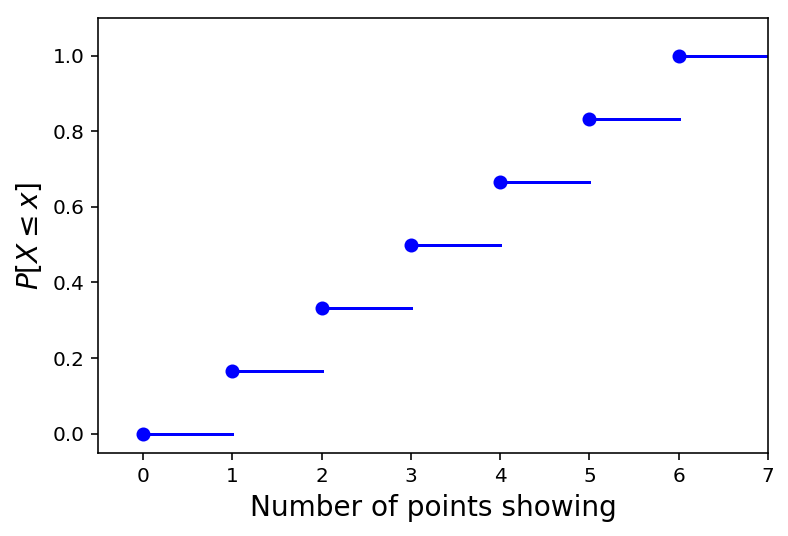

In [22]:
plt.figure()
for i in range(7):
    plt.plot(i,i/6.,'ob')
    plt.plot([i,i+1],[i/6.,i/6.],'-b')
plt.xlim([-0.5,7])
plt.ylim([-0.05,1.1])
plt.xlabel('Number of points showing',size=14)
plt.ylabel(r'$P[X\leq x]$',size=14)
print('')

Now, consider this CDF of some random variable:

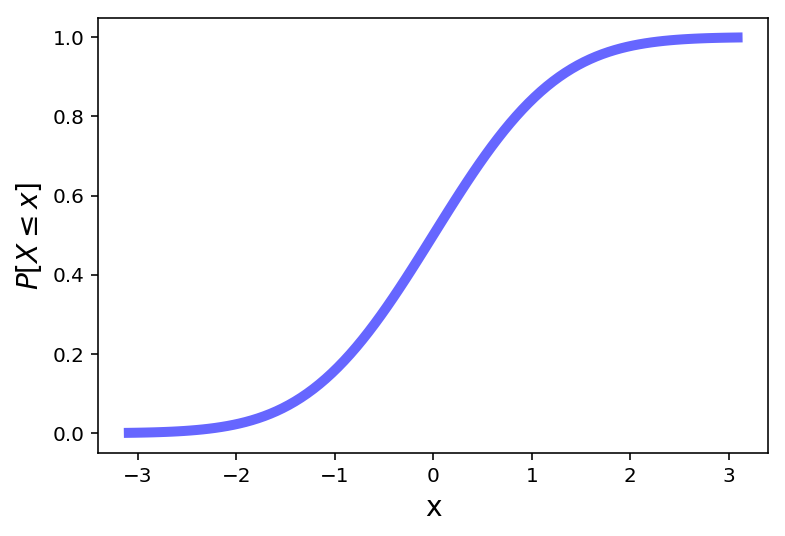

In [23]:
from scipy.stats import norm
plt.figure()
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
plt.plot(x, norm.cdf(x),'b-', lw=5, alpha=0.6)
plt.xlabel('x',size=14)
plt.ylabel(r'$P[X\leq x]$',size=14)
print('')

What does it mean when the slope is steeper for some $x$ values? The slope tells us how likely values are in a particular range. This is important enough that we define a function to capture it.

**Definition:** The _probability density function_ (PDF) is the derivative of the CDF (when it is defined):

$$ f(x) = \frac{dF(x)}{dx}.$$

Often we will go the other way as well:

$$ F(x) = \int_{-\infty}^{x} f(t)\; dt $$

You should be able to see that:

$$ \int_{-\infty}^{+\infty} f(x)\; dx = 1 $$

and

$$      f(x) \geq 0 $$

Now, for a discrete random variable, the CDF is not differentiable (because the CDF is a step function). For the PDF of discrete RVs, we simply plot the probability function of each value.  That is, we plot $P[X = x]$ for the various values of $x$.

Another way to think of the PDF is that it consists of impulses at the points of discontinuity of the CDF. 

For our example of the single die:

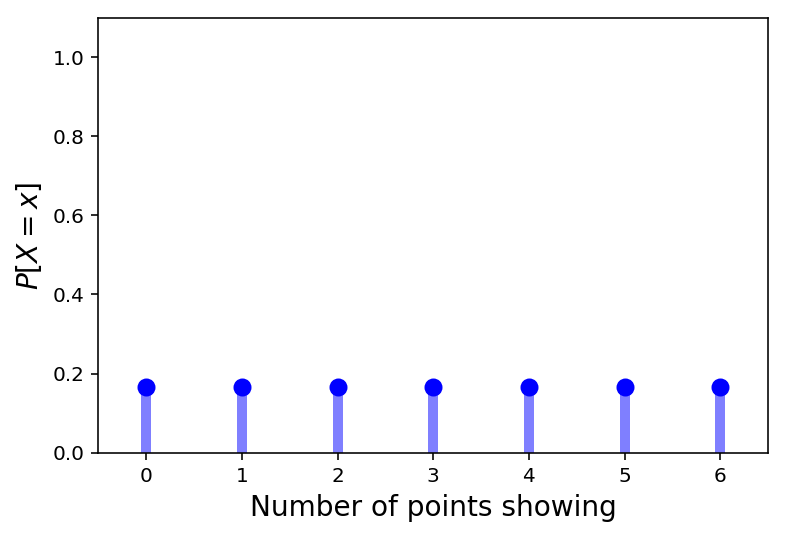

In [7]:
plt.figure()
x = np.arange(7)
plt.plot(x, 7*[1/6.], 'bo', ms=8)
plt.vlines(x, 0, 1/6., colors='b', lw=5, alpha=0.5)
plt.xlim([-0.5,6.5])
plt.ylim([0,1.1])
plt.xlabel('Number of points showing',size=14)
plt.ylabel(r'$P[X = x]$',size=14)
print('')